In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from Finite_volume_method_1D import *

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 200,
})


# Aluminum Test

In [2]:
#Al

R=12e-6
Q0=104.15
N_init=10784
D_all=15000
sigma_init=1

# define geometry
dt=0.1
dx=0.5
L=310 # make sure dx cleanly divides L
N=int(L/dx)
x_borders=np.linspace(-L/2,L/2,N,endpoint=True)
x_centers=np.linspace(-L/2+dx,L/2-dx,N-1,endpoint=True)
D=np.ones_like(x_borders)*D_all

# IC
Q_init = np.exp(-0.5*(x_centers/sigma_init)**2)*N_init/(sigma_init*np.sqrt(2*np.pi))
print(np.sum(Q_init)*dx)

# Simulation
T=50
t_axis_Al = np.arange(0,T+dt,dt)
Q_list_Al = simulate(Q_init,int(T/dt),dt,dx,D_all,R,Q0,method='CrankNicolson')

10784.000000000002


 20%|██        | 100/500 [00:42<02:26,  2.73it/s]

#$\beta$-Tantalum Test

In [ ]:
#bTa

R=0.0034193
Q0=1.4623
N_init=14963
D_all=50
sigma_init=1

# define geometry
dt=0.05
dx=0.5
L=90 # make sure dx cleanly divides L
N=int(L/dx)
x_borders=np.linspace(-L/2,L/2,N,endpoint=True)
x_centers=np.linspace(-L/2+dx,L/2-dx,N-1,endpoint=True)
D=np.ones_like(x_borders)*D_all

# IC
Q_init = np.exp(-0.5*(x_centers/sigma_init)**2)*N_init/(sigma_init*np.sqrt(2*np.pi))
print(np.sum(Q_init)*dx)

# Simulation
T=50
t_axis_bTa = np.arange(0,T+dt,dt)
Q_list_bTa = simulate(Q_init,int(T/dt),dt,dx,D_all,R,Q0,method='CrankNicolson')

14963.000000000002


100%|██████████| 1000/1000 [00:21<00:00, 45.68it/s]


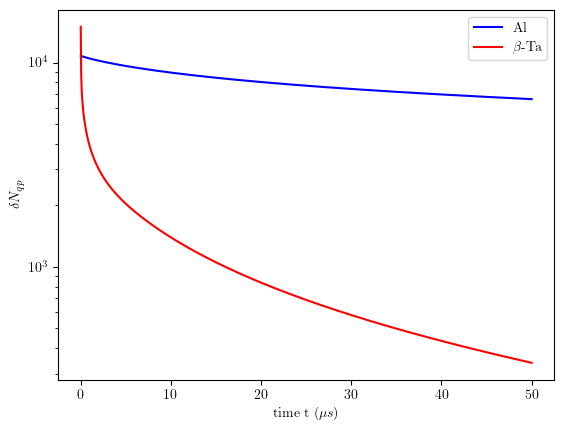

In [ ]:
#CN
intQ_Al_list = np.sum(Q_list_Al*dx,axis=1).flatten()
intQ_bTa_list = np.sum(Q_list_bTa*dx,axis=1).flatten()

'''
for i in range(Q_list.shape[0])[::300]:
  plt.plot(x_centers,Q_list[i,:])
plt.show()'''

plt.semilogy(t_axis_Al,intQ_Al_list,color='b',label='Al')
plt.semilogy(t_axis_bTa,intQ_bTa_list,color='r',label=r'$\beta$-Ta')
plt.xlabel(r'time t ($\mu s$)')
plt.ylabel(r'$\delta N_{qp}$')
plt.legend()

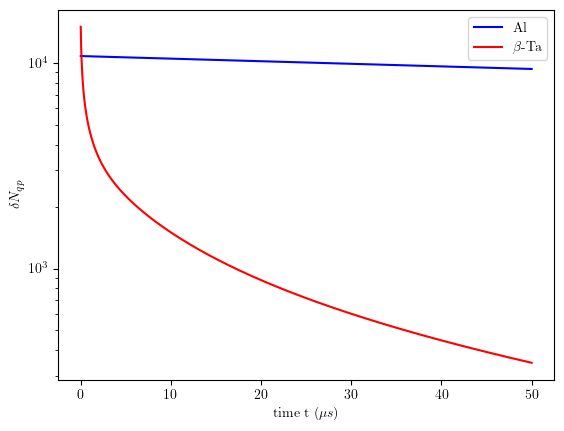

In [ ]:
#BWE
intQ_Al_list = np.sum(Q_list_Al*dx,axis=1).flatten()
intQ_bTa_list = np.sum(Q_list_bTa*dx,axis=1).flatten()

'''
for i in range(Q_list.shape[0])[::300]:
  plt.plot(x_centers,Q_list[i,:])
plt.show()'''

plt.semilogy(t_axis_Al,intQ_Al_list,color='b',label='Al')
plt.semilogy(t_axis_bTa,intQ_bTa_list,color='r',label=r'$\beta$-Ta')
plt.xlabel(r'time t ($\mu s$)')
plt.ylabel(r'$\delta N_{qp}$')
plt.legend()

# Testing IC spread

100%|██████████| 1000/1000 [00:30<00:00, 32.79it/s]


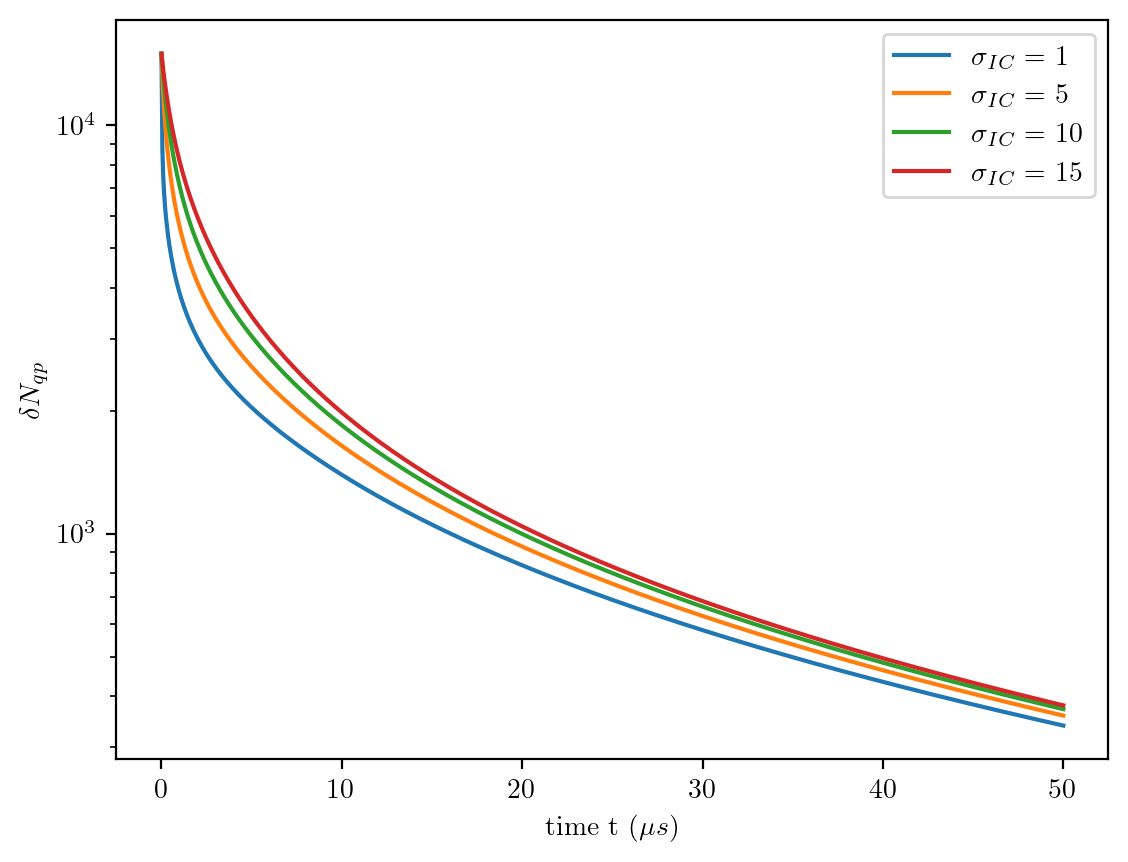

In [ ]:
#bTa

R=0.0034193
Q0=1.4623
N_init=14963
D_all=50
sigma_init=1

# define geometry
dt=0.05
dx=0.5
L=90 # make sure dx cleanly divides L
N=int(L/dx)
x_borders=np.linspace(-L/2,L/2,N,endpoint=True)
x_centers=np.linspace(-L/2+dx,L/2-dx,N-1,endpoint=True)
D=np.ones_like(x_borders)*D_all

# IC
Q_init = np.exp(-0.5*(x_centers/sigma_init)**2)*N_init/(sigma_init*np.sqrt(2*np.pi))

T=50
Q_list_list = []
sigma_list=[1,5,10,15]
for sigma_init in sigma_list:
  Q_init = np.exp(-0.5*(x_centers/sigma_init)**2)*N_init/(sigma_init*np.sqrt(2*np.pi))
  t_axis_bTa = np.arange(0,T+dt,dt)
  Q_list_bTa = simulate(Q_init,int(T/dt),dt,dx,D_all,R,Q0,method='CrankNicolson')
  Q_list_list += [Q_list_bTa]

for i,Q_list_bTa in enumerate(Q_list_list):
  sigma = sigma_list[i]
  intQ_bTa_list = np.sum(Q_list_bTa*dx,axis=1).flatten()
  plt.semilogy(t_axis_bTa,intQ_bTa_list,label=r'$\sigma_{IC}=$ '+str(sigma))

plt.xlabel(r'time t ($\mu s$)')
plt.ylabel(r'$\delta N_{qp}$')
plt.legend()

  9%|▊         | 43/500 [00:17<02:58,  2.56it/s]/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
100%|██████████| 500/500 [03:18<00:00,  2.52it/s]


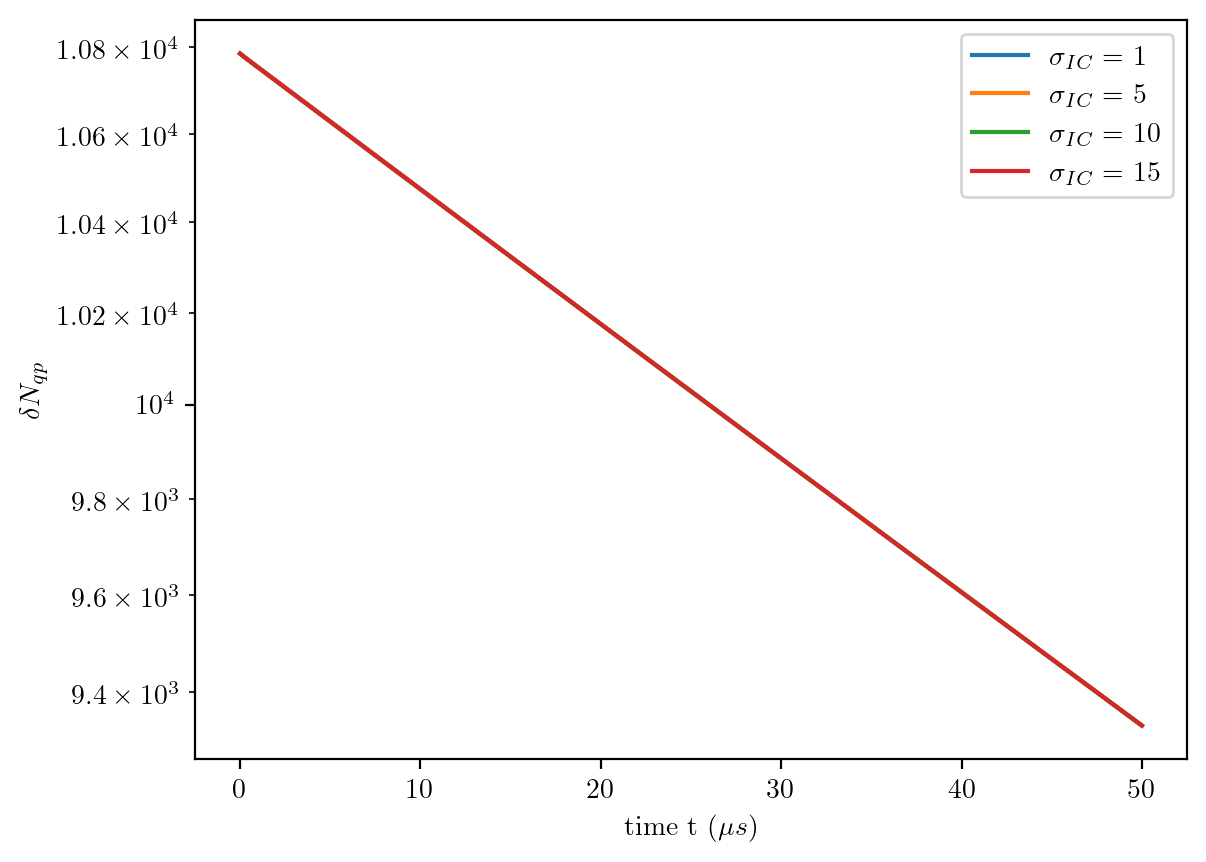

In [ ]:
#Al

R=12e-6
Q0=104.15
N_init=10784
D_all=15000
sigma_init=3

# define geometry
dt=0.1
dx=0.5
L=310 # make sure dx cleanly divides L
N=int(L/dx)
x_borders=np.linspace(-L/2,L/2,N,endpoint=True)
x_centers=np.linspace(-L/2+dx,L/2-dx,N-1,endpoint=True)
D=np.ones_like(x_borders)*D_all

# IC
Q_init = np.exp(-0.5*(x_centers/sigma_init)**2)*N_init/(sigma_init*np.sqrt(2*np.pi))

T=50
Q_list_list = []
sigma_list=[1,5,10,15]
for sigma_init in sigma_list:
  Q_init = np.exp(-0.5*(x_centers/sigma_init)**2)*N_init/(sigma_init*np.sqrt(2*np.pi))
  t_axis_bTa = np.arange(0,T+dt,dt)
  Q_list_bTa = simulate(Q_init,int(T/dt),dt,dx,D_all,R,Q0)
  Q_list_list += [Q_list_bTa]

for i,Q_list_bTa in enumerate(Q_list_list):
  sigma = sigma_list[i]
  intQ_bTa_list = np.sum(Q_list_bTa*dx,axis=1).flatten()
  plt.semilogy(t_axis_bTa,intQ_bTa_list,label=r'$\sigma_{IC}=$ '+str(sigma))

plt.xlabel(r'time t ($\mu s$)')
plt.ylabel(r'$\delta N_{qp}$')
plt.legend()